In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import pandas as pd

from numpy import linspace, log, sin, pi
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit


The first few steps is how to import the data, how to split it up into x and y-values and how to plot a graph of all the data. (Check out Dr. Oswald's tutorial, it's all there).

I tend to print stuff out for myself so I can see if I've got what I need.  Most of the printing parts are unnecessary. If the code looks too long to you, just hashtag out all the "print(blah)" stuff.  I just included it so you can see my process.

In [2]:
#getting the data (make sure the file is in the same folder as your python file and copy the name of the file exactly)

data = np.loadtxt('germaniumdet_na22.xy')

#Seeing what it looks like:

print(data)
print(type(data))
print(np.shape(data))

[[0.000e+00 1.370e+02]
 [1.000e+00 0.000e+00]
 [2.000e+00 0.000e+00]
 ...
 [8.189e+03 0.000e+00]
 [8.190e+03 0.000e+00]
 [8.191e+03 0.000e+00]]
<class 'numpy.ndarray'>
(8192, 2)


In [3]:
#The data above is a 8192 x 2 matrix.  We need to extract the x and y values:

data_x, data_y = np.loadtxt('germaniumdet_na22.xy',usecols=(0,1),unpack=True)

#Just checking to see what it looks like:
print("data_x =", data_x)
print("data_y =",  data_y)
print(len(data_x))
print(len(data_y))

data_x = [0.000e+00 1.000e+00 2.000e+00 ... 8.189e+03 8.190e+03 8.191e+03]
data_y = [137.   0.   0. ...   0.   0.   0.]
8192
8192


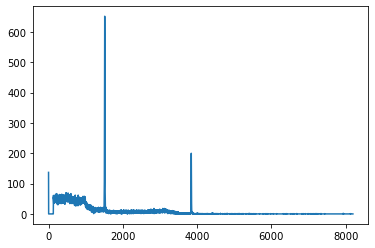

In [4]:
#Plotting all the raw data

plt.plot(data_x, data_y)

The graph above is small and hard to read.  If you want to zoom in, you can use plt.axis([xmin,xmax,ymin,ymax])

So, to look at the peaks, I'm going to zoom in on the region between 3000 to 4500.  I'm going to do this so I have a better idea of the limits of the data I want to analyze. It also will help me estimate better the center of the gaussian.

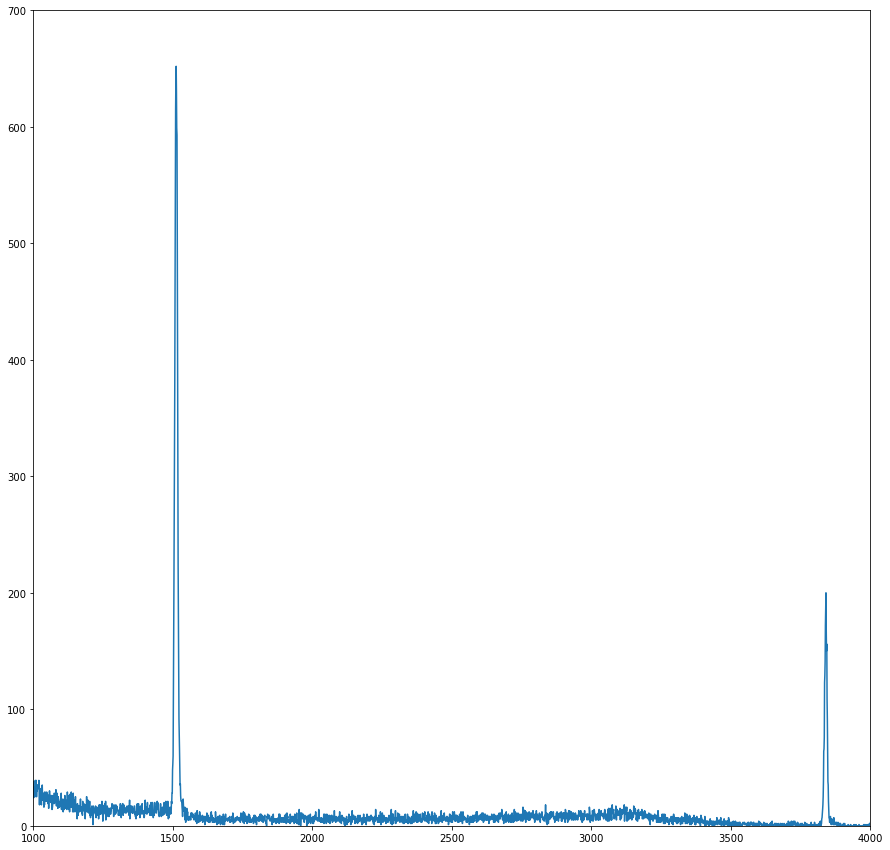

In [5]:
plt.figure(1,figsize=(15,15)) #Increasing the size so we can see better.

plt.axis([1000,4000,0, 700]) #Restricting the x-axis

plt.plot(data_x, data_y)

Now we consider two methods of finding the mean of the peaks (center of the Gaussian function). 

The first method will be by adding up the raw data and finding the weighted mean and standard deviation.
The second will be by curve fitting a gaussian to the raw data.

In both cases that follow, I've only looked at the data close to the first peak. You can do the same method for the second peak If you are using curve fitting, you can do it for the whole graph all at once, if you choose your functions wisely.

I picked a range of values and then went back and adjusted them as needed. 

_____________________________________________________________________________________________________________________________

Method 1:  Restricting the data to just values of x in [1499,1525] (There may be better ways of doing it, it's just something I just figured out. Also, I just looked at the raw data to figure out the approximate bounds around 1500).

In [6]:
#First restrict the data to values of x less than 1525.  

data2=data[data[:,0]<1525]

#Next getting(restricting to) the values above 1500 (You could do it the other way around too)

data3=data2[data2[:,0]>1499]


#The " : " says to check every row.  The 0 means the first element
# of each row. Python starts ennumerating at 0. If you wanted to put conditions on a column, replace the 0 by 1. 
#(for a matrix with more than 2 columns, if you wished to pick out elements of the third column, you'd use 2, etc...)


#Checking (Compare to raw data and make sure it's picked out what you want)

print("DATA3:", data3)
print("length of data3 =", len(data3))

DATA3: [[1500.   53.]
 [1501.   60.]
 [1502.  105.]
 [1503.  158.]
 [1504.  209.]
 [1505.  260.]
 [1506.  328.]
 [1507.  381.]
 [1508.  472.]
 [1509.  543.]
 [1510.  615.]
 [1511.  642.]
 [1512.  652.]
 [1513.  630.]
 [1514.  599.]
 [1515.  593.]
 [1516.  496.]
 [1517.  412.]
 [1518.  323.]
 [1519.  224.]
 [1520.  174.]
 [1521.  112.]
 [1522.   92.]
 [1523.   76.]
 [1524.   65.]]
length of data3 = 25


Now that I have the data in the ranges I need, I'll split it into x and y values and calculate the mean.

In [7]:
#Getting x and y values.  We now have a matrix, so we're taking the first element of each row for the x values
#and the second element of each row for the y-values. 

x_values= data3[:,0] 

y_values=data3[:,1]

#The usual check to see if we have what we need:

print(x_values)
print(y_values)
print(len(x_values))
print(len(y_values))

[1500. 1501. 1502. 1503. 1504. 1505. 1506. 1507. 1508. 1509. 1510. 1511.
 1512. 1513. 1514. 1515. 1516. 1517. 1518. 1519. 1520. 1521. 1522. 1523.
 1524.]
[ 53.  60. 105. 158. 209. 260. 328. 381. 472. 543. 615. 642. 652. 630.
 599. 593. 496. 412. 323. 224. 174. 112.  92.  76.  65.]
25
25


In [8]:
# Calculating the weighted mean and RMS.  The y-values are the number of counts.

mean=np.sum(y_values*x_values)/np.sum(y_values)
print("Mean =", mean)

RMS = np.sqrt(np.sum(np.sum(y_values*(x_values-mean)**2)/np.sum(y_values)))
print("RMS = ", RMS)


Mean = 1511.9481508339377
RMS =  4.895879349341306


__________________________________________________________________________________________________________________________

Second Method: Curve Fitting

Here we define a fit_function (see "Fitting a function to data from a histogram"). 

The first argument is the variable, the one following it are constants.  It's important to give the function an initial guess
for the constants.  You want to zoom in and choose your constants wisely.  If you don't get a good curve fit on your first try, try adjusting the constants.  Sometimes that fixes the problem.  Otherwise you may need to reconsider your functions.

[ 6.39650406e+02  1.51199927e+03  4.92877197e+00 -4.14712050e-03
  2.49388015e+01]
[5.00944827e+00 4.45539634e-02 4.46064096e-02 5.65679239e-05
 2.67907327e-01]


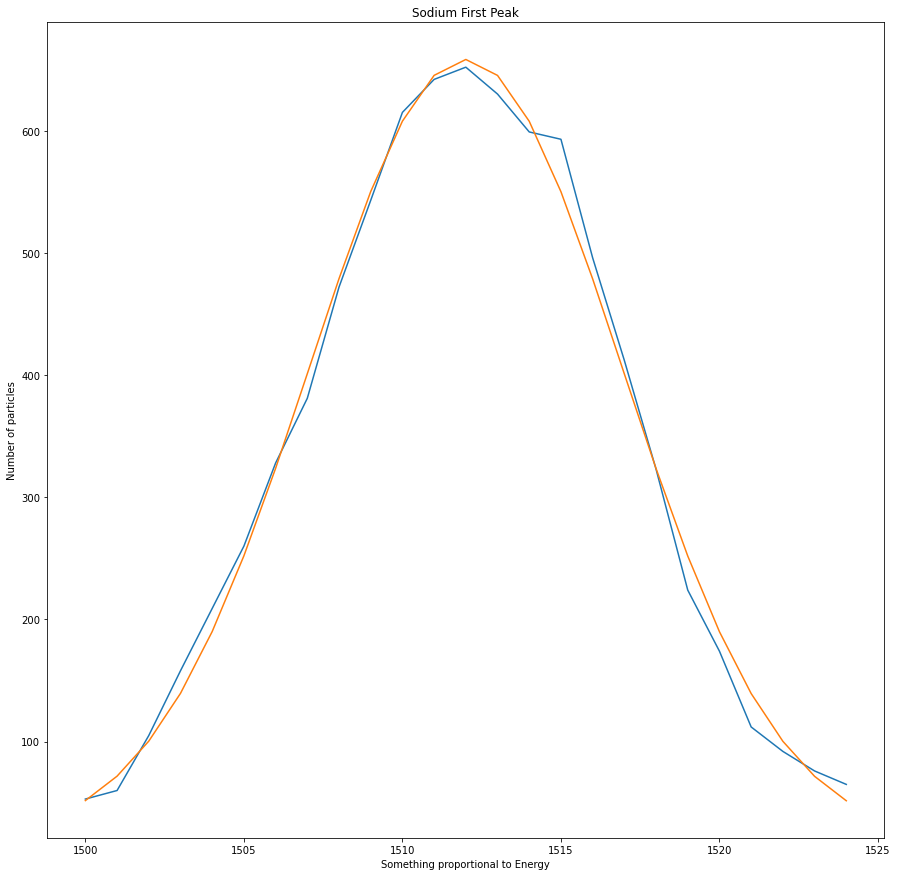

In [9]:
# I'm going to work with just the first peak.  It's possible to do the whole graph all at once by just modelling 
# a function that is the sum of two or more gaussians as needed.  It worked fine for me for all the graphs but Europium. 
#I've now realized that it's better to consider the individual peaks.

#Since we're working with only one peak, I'm going to use a gaussian for the peak and a line for the noise.

def model(x, A_1, a_1, b_1, A_2, b_2):
    return (A_1*np.exp(-(x-a_1)**2/(2*(b_1**2)))+A_2*x+b_2)

init_guess=[650, 1500, 10, -1, 25] # A_1 is the height, a_1 is the center, b_1 is the width, A_2 is the slope of the line, b_2 is the intercept. 

fit=curve_fit(model, data_x, data_y, p0=init_guess)

ans,cov=fit #curve_fit gives us 2 kinds of outputs. First are best values of the constants "ans" and cov (covariance) is a matrix. Look it up if you want more details ;)


fit_A_1,fit_a_1, fit_b_1, fit_A_2, fit_b_2 = ans

print(ans) # give us the values we are looking for. See above.

plt.figure(1,figsize=(15,15))

print(np.sqrt(np.diag(cov))) #Gives us the errors (covariance) of each corresponding value.

plt.plot(x_values, y_values)

plt.title('Sodium First Peak')
plt.xlabel('Something proportional to Energy')
plt.ylabel('Number of particles')

t=x_values
plt.plot(t, model(t,fit_A_1, fit_a_1,fit_b_1, fit_A_2, fit_b_2))




In [10]:
#As I said before, the values of ans gave us the values we were looking for.  In particular:
print("Mean=", fit_a_1, "RMS =", fit_b_1)

Mean= 1511.999266928977 RMS = 4.928771969117899


This is essentially the same as the answer we got by the other method.

Also, you may wonder why I bothered with the polynomial.  You can't see it in this particular case, because I restricted the x-values by quite a bit, but if I'd had more x-values, the polynomial would have modelled the noise.